In [3]:
import pandas as pd
import matplotlib.pyplot as plt # matplotlib.pyplot принято импортировать как "plt", но это не несёт никакой функциональной нагрузки. Исключительно для удобства читающего + будет проще ориентироваться в чужом коде
import seaborn as sns
import numpy as np

## Обработка таблицы (пакет pandas)

In [4]:
df = pd.read_csv('sequences.csv')

В формате csv могут использоваться различные разделители. По умолчанию *read_csv* читает файл с разделителем ",". Если нужно поменять разделить, используем опцию *sep=*"символ разделителя". Например, если разделитель tab, то команда будет иметь следующий вид:

*df = pd.read_csv('sequences.csv', sep='\t')*, где символ *'\t'* означает tab

Советую отдельно изучить управляющие символы строк. Очень кратко по ссылкам:
- https://pythonz.net/references/named/control-characters/
- Пункт 2 https://pythonclass.ru/python/stroki-i-funkciya-print-v-python/ 

Также очень часто в функции *read_csv* используется опция *index_col*, позволяющая сразу задать какую-либо колонку как индекс таблицы.

Если хотим красиво отобразить таблицу, можно использовать функцию *.head(n)*, которая выводит *n* строк.

In [4]:
df.head(4)

,Release_Date,Species,Host,Tissue_Specimen_Source,Collection_Date
0,2023-05-04,Pestivirus bovis,NaN,NaN,NaN
1,2023-05-04,Pestivirus tauri,Bos taurus,NaN,2004-12-08
2,2023-05-04,Rodent pestivirus,Apodemus peninsulae,NaN,2014-08
3,2023-05-04,Rodent pestivirus,Niviventer niviventer,NaN,2014-12


Функции можно применять напрямую к столбцам таблицы, не записывая исходный столбец в отдельную переменную. Наша таблица с данными (df) при этом никак не изменится.

In [5]:
species_frequency = df['Species'].value_counts()

In [6]:
species_frequency

Pestivirus suis                                    424
Pestivirus bovis                                   290
Pestivirus tauri                                   155
Pestivirus scrofae                                  95
Pangolin pestivirus                                 60
Pestivirus brazilense                               26
Pestivirus ovis                                     23
Rodent pestivirus                                    9
Pestivirus australiaense                             9
Pestivirus sp.                                       6
Pestivirus M                                         5
Pestivirus L                                         4
Pestivirus aydinense                                 3
Pestivirus P                                         3
Pipistrellus bat pestivirus                          3
Pestivirus giraffae                                  3
Scotophilus bat pestivirus                           2
Pangolin pestivirus 4                                2
Bamboo rat

Для удаления колонки используется функция .drop()

In [7]:
df.drop(columns=["Species"]).head(2)

,Release_Date,Host,Tissue_Specimen_Source,Collection_Date
0,2023-05-04,NaN,NaN,NaN
1,2023-05-04,Bos taurus,NaN,2004-12-08


При этом исходная таблица **не перезаписывается**

In [8]:
df.head(2)

,Release_Date,Species,Host,Tissue_Specimen_Source,Collection_Date
0,2023-05-04,Pestivirus bovis,NaN,NaN,NaN
1,2023-05-04,Pestivirus tauri,Bos taurus,NaN,2004-12-08


Для добавления колонки "приравниваем" новую колонку и данные, которые хотим добавить

In [9]:
df["my_column"] = ["A"]*len(df)

Исходная таблица **перезаписывается**

In [10]:
df.head(2)

,Release_Date,Species,Host,Tissue_Specimen_Source,Collection_Date,my_column
0,2023-05-04,Pestivirus bovis,NaN,NaN,NaN,A
1,2023-05-04,Pestivirus tauri,Bos taurus,NaN,2004-12-08,A


### Полезно!

В свободное время самостоятельно изучите работу с индеками set_index и reset_index, функции для поиска по таблице .loc и .iloc, добавление новых строк в таблицу

Как работает данная команда?

In [11]:
df["Release_Date"].apply(lambda x: x.split("-")[0])

0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
1158    1993
1159    1993
1160    1993
1161    1993
1162    1990
Name: Release_Date, Length: 1163, dtype: object

## Построение графиков (пакет matplotlib.pyplot)

Чтобы картинка не была слишком сжатой или наоборот, слишком растянутой, можно задать её размер.

*plt.figure()* создаёт объект (рисунок), *figsize=(x, y)* задаёт соотношение сторон. Пакет seaborn (sns) позволяет строить красивые графики.

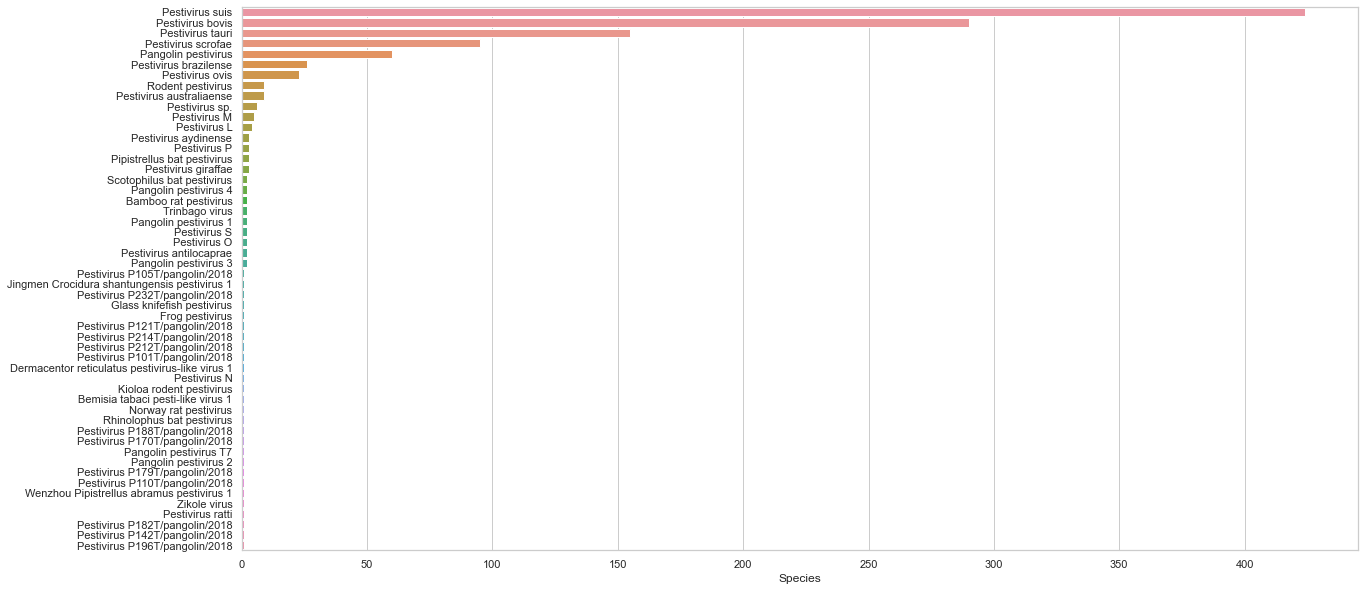

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
sns.barplot(y=species_frequency.index,x=species_frequency)

Иногда приходится отдельно размечать оси, редактировать размер шрифта на самих осях и подписях к ним. 

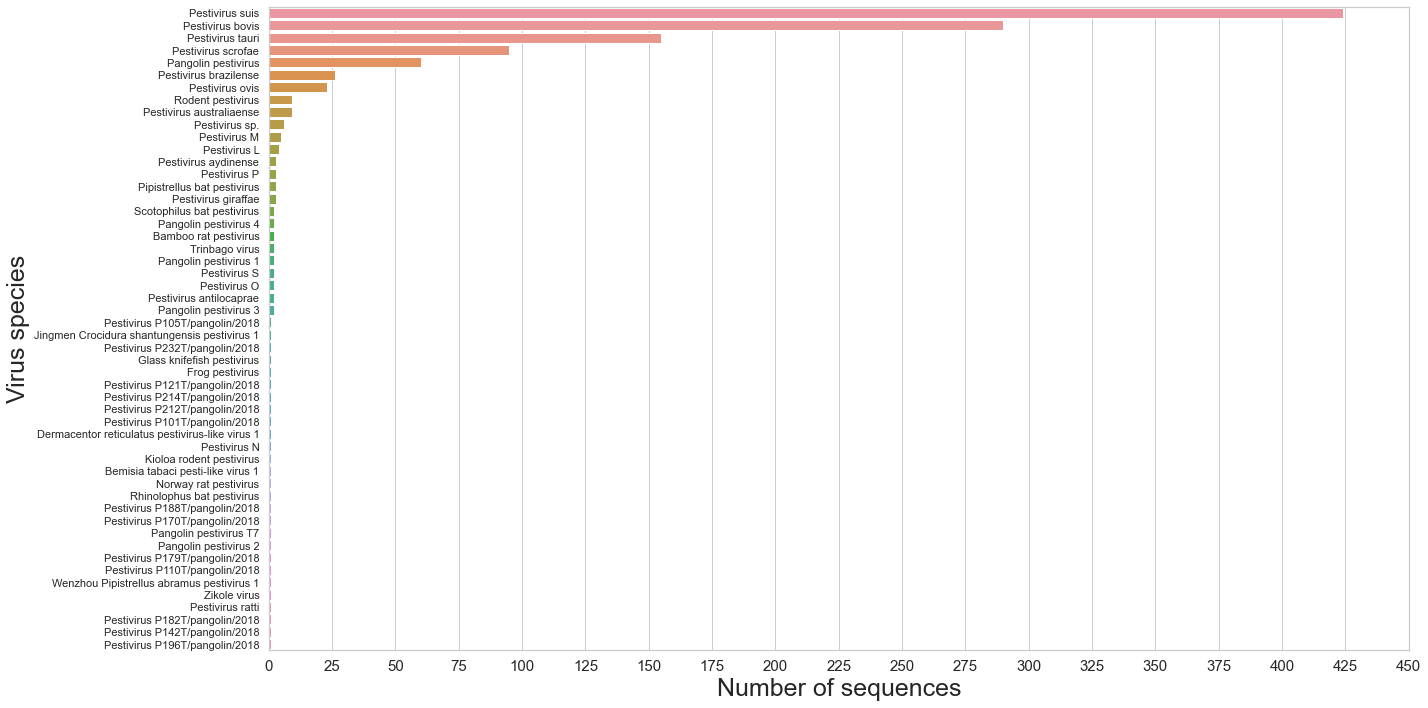

In [13]:
### Опять создаём объект-рисунок

plt.figure(figsize=(20, 10))
sns.barplot(y=species_frequency.index,x=species_frequency)
sns.set(style="whitegrid")


### Добавляем подписи осей и выставляем их шрифт

plt.xlabel("Number of sequences", fontsize = 25)
plt.ylabel("Virus species", fontsize = 25) 



### Редактируем ось X

x_step = 25 # задаём размер шага
x_values = np.arange(0, 451, x_step) # создаём набор чисел от 0 до 450 включительно с шагом x_step
plt.xticks(ticks = x_values, fontsize=15) # задаём новый набор чисел и размер шрифта на оси X



### Редактируем ось Y
plt.yticks(fontsize=11) # размер шрифта на оси Y

### Данную функцию всегда советую пробовать использовать на графике. Иногда делает лучше и уменьшает пустое пространство, а иногда всё ломает :(
plt.tight_layout()

# Jupyter-notebook самостоятельно показывает графики.
# В обычных скриптах (.py файлы) для отображения графика используют следующую функцию:
plt.show()

Когда я выше создавал набор чисел для оси X (переменная *x_values*), я указал максимально зачение = 451.
Это необходимо, чтобы получить интервал [0, 450]. Если оставить 450, то получим интервал [0, 450), тогда максимальное значение с шагом = 25 составит 425, а нас такое не устраивает:

In [14]:
max(np.arange(0, 450, x_step))

425

In [15]:
max(np.arange(0, 451, x_step))

450

Далее. Так как предстоит вывести несколько похожих графиков, можно создать функцию, чтобы каждый раз не копировать код и не менять параметры вручную

In [25]:
def my_hist(x, y, x_label, y_label, hist_label):
    plt.figure(figsize=(20, 10))
    sns.barplot(x=x, y=y) # используем x и y
    
    plt.xlabel(x_label, fontsize = 25) # используем x_label
    plt.ylabel(y_label, fontsize = 25) # используем y_label
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.title(hist_label, fontsize=30, pad=10) #добавляем заголовок используя hist_label
    
    plt.show()
    
    return

Проделываем те же шаги для колонок с хозяевами вирусов и истоника выделения

In [15]:
host_frequency = df['Host'].value_counts()

Применяем готовую функцию

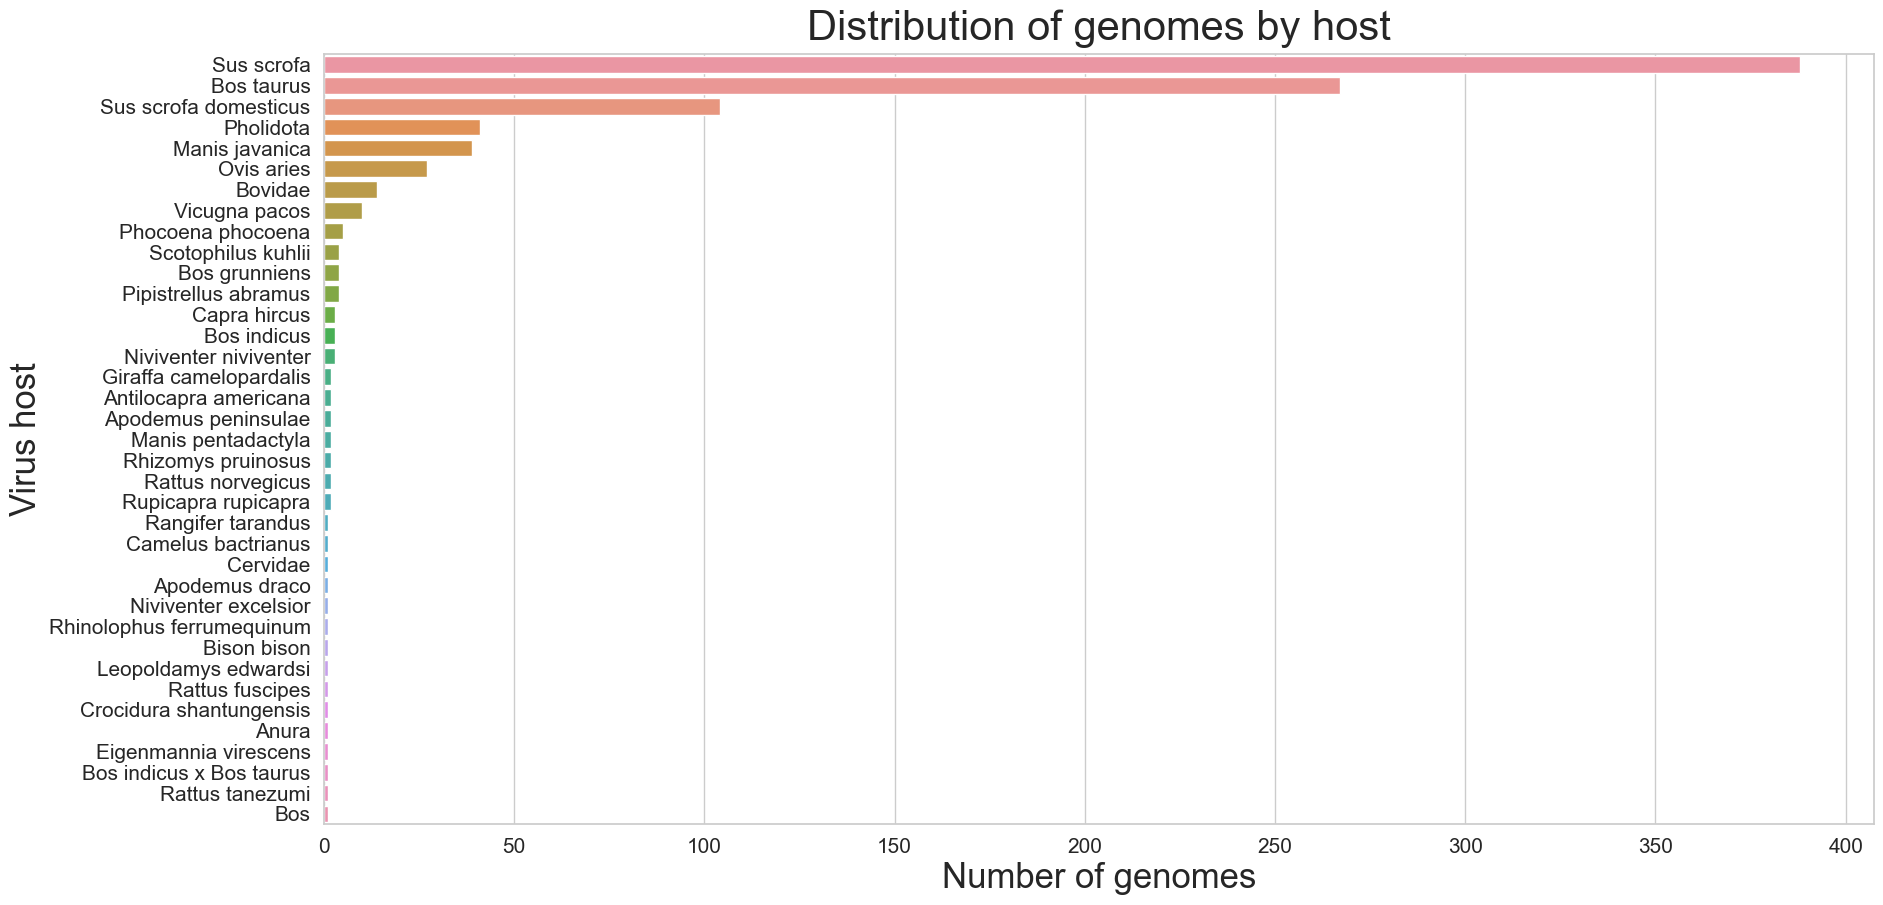

In [26]:
my_hist(host_frequency, host_frequency.index, "Number of genomes", "Virus host", "Distribution of genomes by host")

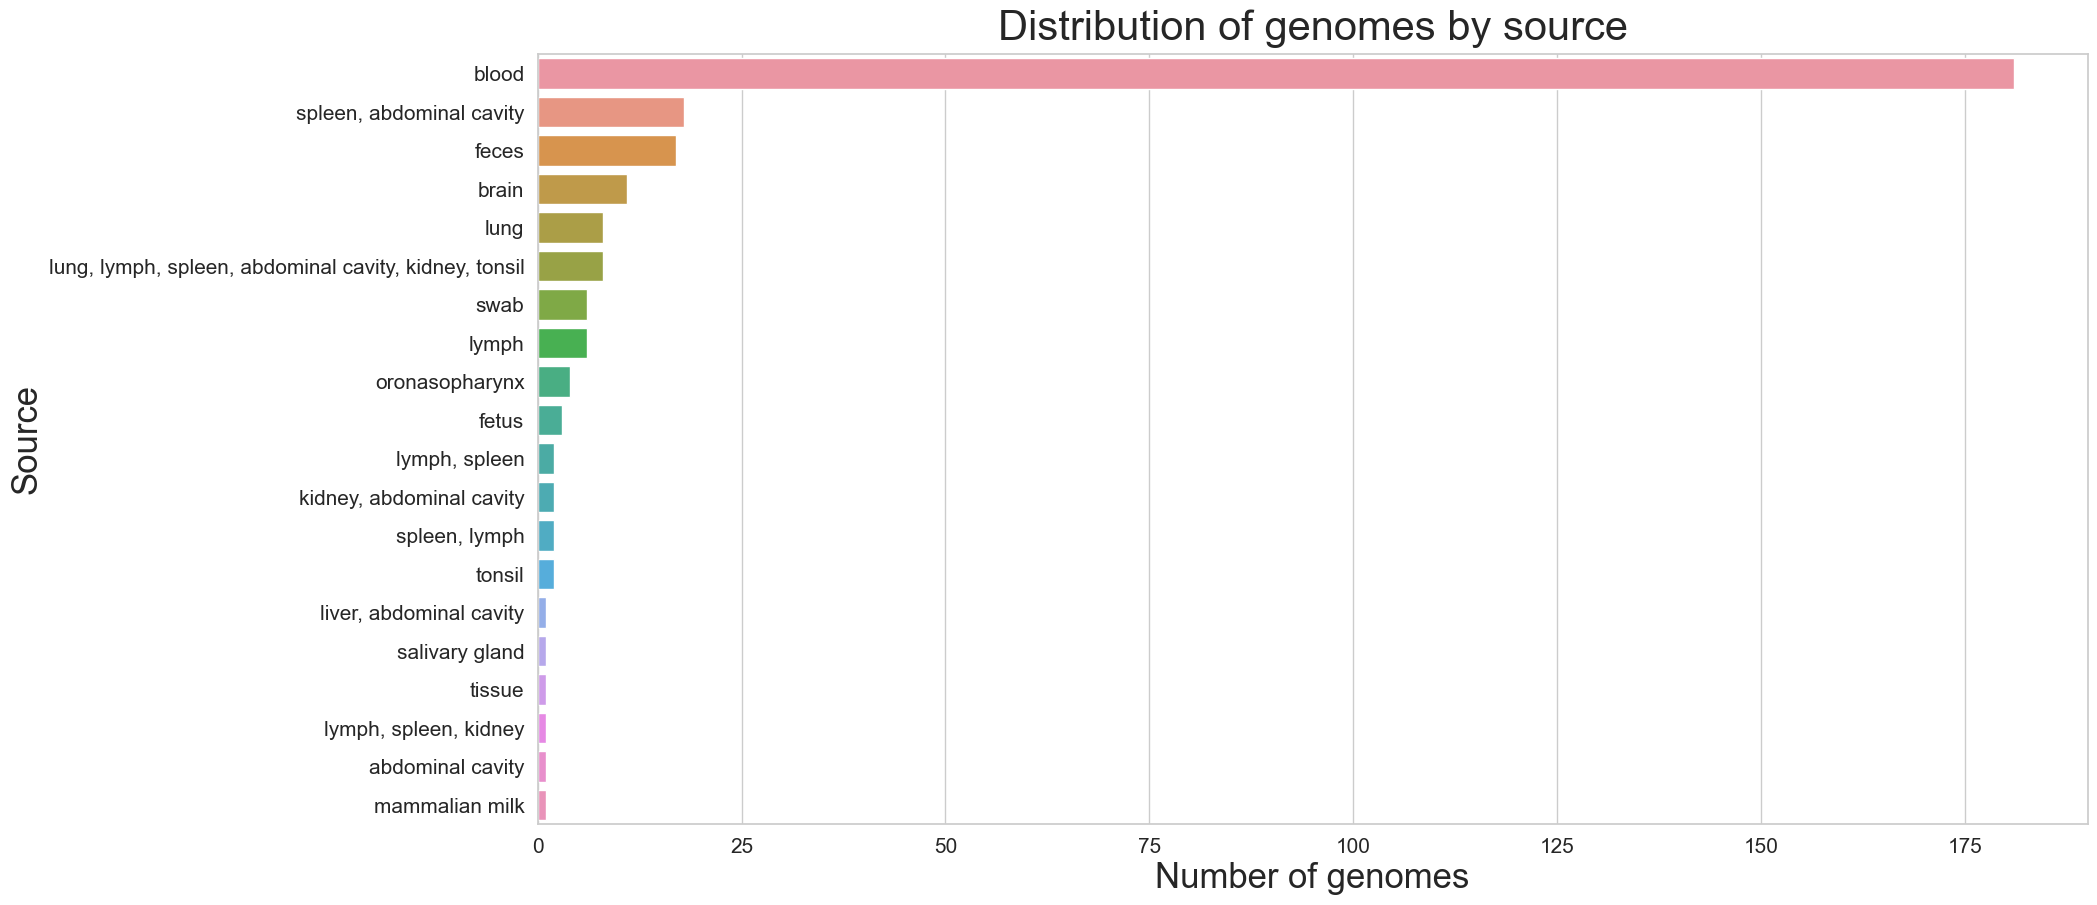

In [27]:
source_frequency = df['Tissue_Specimen_Source'].value_counts()
my_hist(source_frequency, source_frequency.index, "Number of genomes", "Source", "Distribution of genomes by source")

Цикл ниже можно упростить от

In [22]:
release_l=list()
for elem in df['Release_Date']:
    a=elem.split('-')
    release_l.append(a[0])
release_s=pd.Series(release_l)
release_s_sorted = release_s.sort_values(ascending=False)

до

In [29]:
release_s_sorted_NEW = sorted(df["Release_Date"].apply(lambda x: x.split("-")[0]))[::-1]

Функция *sorted()* сортирует массив данных (не обязательно колонки pd.Series). Чтобы поменять последовательность объектов в массиве, можно в конце указать "[::-1]".

Мы получили ровно такой же массив данных, но применили **лямбда-функцию**.

In [30]:
list(release_s_sorted.values) == list(release_s_sorted_NEW)

NameError: name 'release_s_sorted' is not defined

Чтобы применить .value_counts() и подсчитать значения, необходимо перевести release_s_sorted_NEW в pd.Series

In [31]:
release_s_sorted_NEW = pd.Series(release_s_sorted_NEW)

In [32]:
release_frequency_NEW = release_s_sorted_NEW.value_counts(sort=False).sort_index(ascending=False)

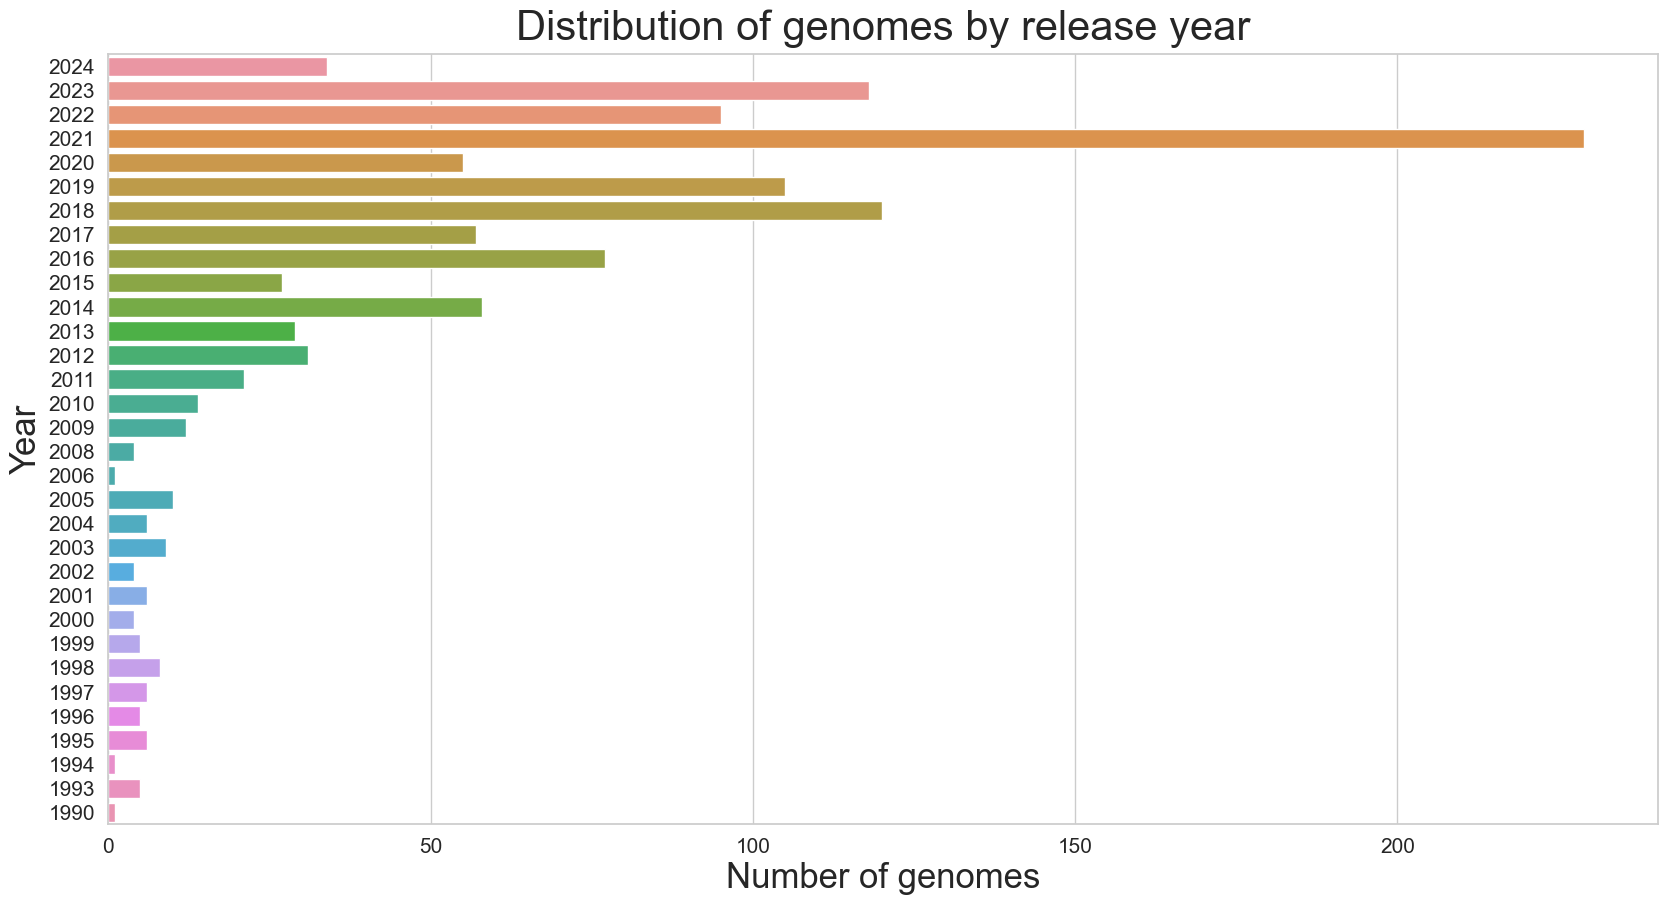

In [35]:
my_hist(release_frequency_NEW, release_frequency_NEW.index, "Number of genomes", "Year", "Distribution of genomes by release year")

Потренируйтесь в применении **лямбда-функции** и упростите код ниже. Также добавьте заголовки к рисункам (подсказка - .title()).

In [10]:
collection_s_sorted_NEW = sorted(df['Collection_Date'].dropna().apply(lambda x: x.split('-')[0]))[::-1]

In [34]:
collection_frequency_NEW = pd.Series(collection_s_sorted_NEW).value_counts(sort=False).sort_index(ascending=False)

In [6]:
collection_l=list()
for elem in df['Collection_Date'].dropna():
    a=elem.split('-')
    collection_l.append(a[0])
collection_s=pd.Series(collection_l)
collection_s_sorted = collection_s.sort_values(ascending=False)
collection_frequency = collection_s_sorted.value_counts(sort=False)

In [11]:
list(collection_s_sorted) == list(collection_s_sorted_NEW)

True

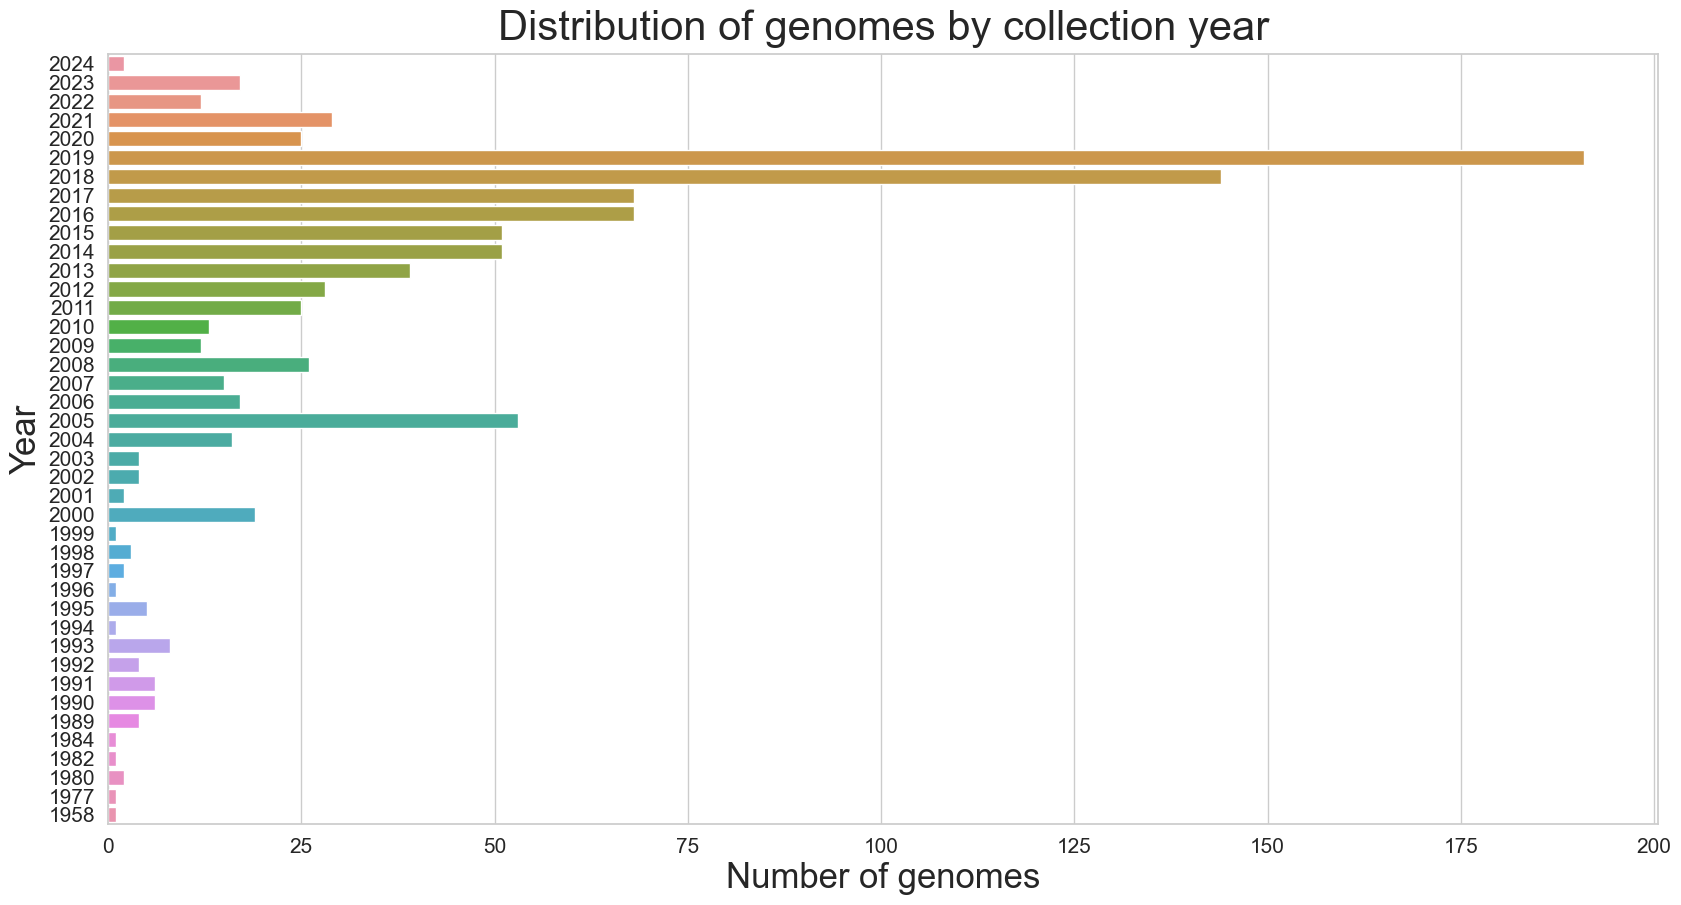

In [36]:
my_hist(collection_frequency_NEW, collection_frequency_NEW.index, "Number of genomes", "Year", "Distribution of genomes by collection year")